<a href="https://colab.research.google.com/github/arfandiTelU/Skripsi/blob/master/Cnn_Klasifikasi_Bibit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Menghubungkan Dengan Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Install Library

In [0]:
!pip install -q keras
!pip install opencv-contrib-python

Import Library

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from matplotlib import pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Mengambil, Memproses, Dan Membagi Data

In [2]:
train_dir = '/content/gdrive/My Drive/Dataset/Train'
test_dir = '/content/gdrive/My Drive/Dataset/Test'

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.115,
                                   rotation_range=30, zoom_range=0.15,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.15, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=.115)
test_datagen = ImageDataGenerator(rescale=1./255)

IMAGE_SHAPE = (150,150)

valid_generator = train_datagen.flow_from_directory(
    train_dir,
    subset = "validation",
    shuffle = True,
    target_size = IMAGE_SHAPE,
    batch_size = 32
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    subset = "training",
    shuffle = True,
    target_size = IMAGE_SHAPE,
    batch_size = 32
)

FileNotFoundError: ignored

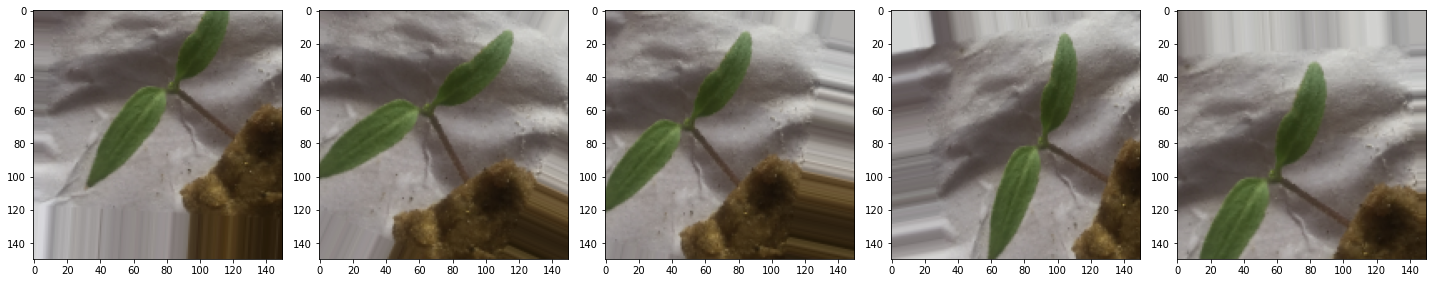

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Cabai' 'Pakcoy' 'Sawi' 'Terong' 'Tomat']


Membangun Arsitektur Model

In [0]:
# print(train_generator.num_classes)
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation = 'relu', input_shape = (150,150,3)))
# model.add(layers.Conv2D(8, (3,3), padding='same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, (3,3), padding='same', activation = 'relu'))
# model.add(layers.Conv2D(32, (3,3), strides=(1,1), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(32, (3,3), padding='same', activation = 'relu'))
# model.add(layers.MaxPool2D((3,3)))

# model.add(layers.Conv2D(32, (3,3), padding='same', activation = 'relu'))
# model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3,3), padding='same', activation = 'relu'))
# model.add(layers.Conv2D(64, (3,3), padding='same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3,3), padding='same', activation = 'relu'))
# model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(256, (2,2), activation = 'relu'))
# model.add(layers.MaxPool2D((2,2)))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation = 'relu'))

# model.add(layers.Dense(64, activation = 'relu'))

# model.add(layers.Dropout(0.4))

model.add(layers.Dense(5, activation = 'softmax'))

# model = models.Sequential([
#   hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
#                  output_shape=[1280],
#                  trainable=False),
#   layers.Dropout(0.4),
#   layers.Dense(5, activation='softmax')
# ])
# model.build([None, 224, 224, 3])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 18, 18, 128)      

In [0]:
model.compile(
  # optimizer=optimizers.RMSprop(lr=1e-4),
  optimizer=optimizers.Adam(),
  # optimizer=optimizers.Adam(lr=0.00001),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [0]:
history = model.fit(
    train_generator,
    steps_per_epoch = 32, 
    epochs = 30,
    validation_data=valid_generator,
    validation_steps = 5)

# history = model.fit(
#     train_generator, 
#     epochs = 20,
#     steps_per_epoch = 26,
#     validation_data=valid_generator,
#     validation_steps = 4)

Epoch 1/30
32/32 [==============================] - 36s 1s/step - loss: 1.6160 - acc: 0.2255 - val_loss: 1.5870 - val_acc: 0.2769
Epoch 2/30
32/32 [==============================] - 36s 1s/step - loss: 1.5065 - acc: 0.3392 - val_loss: 1.4799 - val_acc: 0.3615
Epoch 3/30
32/32 [==============================] - 36s 1s/step - loss: 1.3884 - acc: 0.4353 - val_loss: 1.5458 - val_acc: 0.3462
Epoch 4/30
32/32 [==============================] - 35s 1s/step - loss: 1.4214 - acc: 0.3882 - val_loss: 1.3800 - val_acc: 0.4077
Epoch 5/30
32/32 [==============================] - 35s 1s/step - loss: 1.2851 - acc: 0.4569 - val_loss: 1.4269 - val_acc: 0.3385
Epoch 6/30
32/32 [==============================] - 35s 1s/step - loss: 1.2643 - acc: 0.4755 - val_loss: 1.4172 - val_acc: 0.4462
Epoch 7/30
32/32 [==============================] - 35s 1s/step - loss: 1.1062 - acc: 0.5343 - val_loss: 1.2450 - val_acc: 0.4615
Epoch 8/30
32/32 [==============================] - 34s 1s/step - loss: 0.9985 - acc: 0.58

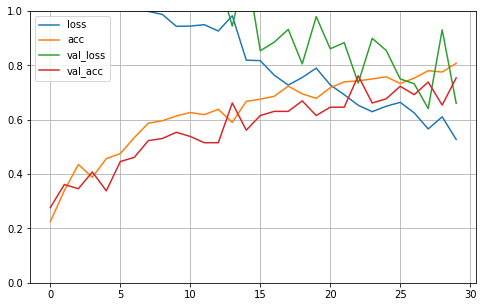

In [0]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
# FLOWERS_SAVED_MODEL = "saved_models/flowers"
MODEL_PATH = "/content/gdrive/My Drive/Models/model_2.h5"
model.save(MODEL_PATH)
# tf.keras.experimental.export_saved_model(model, MODEL_PATH)

In [0]:
loaded_model = model
loaded_model.load_weights(MODEL_PATH, by_name=True)
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = IMAGE_SHAPE,
    batch_size = 65
)

Found 65 images belonging to 5 classes.


In [0]:
evaluate = model.evaluate(test_generator, steps = 1)

1/1 [==============================] - 0s 1ms/step - loss: 0.7540 - acc: 0.7077


In [0]:
test_image_batch, test_label_batch = next(iter(test_generator))
true_label_ids = np.argmax(test_label_batch, axis=-1)

In [0]:
test_image_batch, test_label_batch = next(iter(test_generator))
true_label_ids = np.argmax(test_label_batch, axis=-1)
predict = model.predict(test_image_batch)
pred_dataframe = pd.DataFrame(predict)
pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
pred_dataframe

Prediction results for the first elements


,Cabai,Pakcoy,Sawi,Terong,Tomat
0,4.484912e-04,0.120880,0.039509,0.768792,0.070371
1,2.480605e-06,0.188705,0.025268,0.777887,0.008138
2,9.216789e-01,0.010938,0.011169,0.002360,0.053854
3,7.056891e-05,0.490688,0.285836,0.222023,0.001383
4,3.628716e-10,0.361546,0.026208,0.611597,0.000648
...,...,...,...,...,...
60,9.794765e-01,0.001785,0.013169,0.000934,0.004636
61,4.472501e-04,0.683682,0.237774,0.077684,0.000413
62,3.342568e-03,0.043831,0.036817,0.531165,0.384844
63,1.475224e-04,0.034563,0.149329,0.711926,0.104034


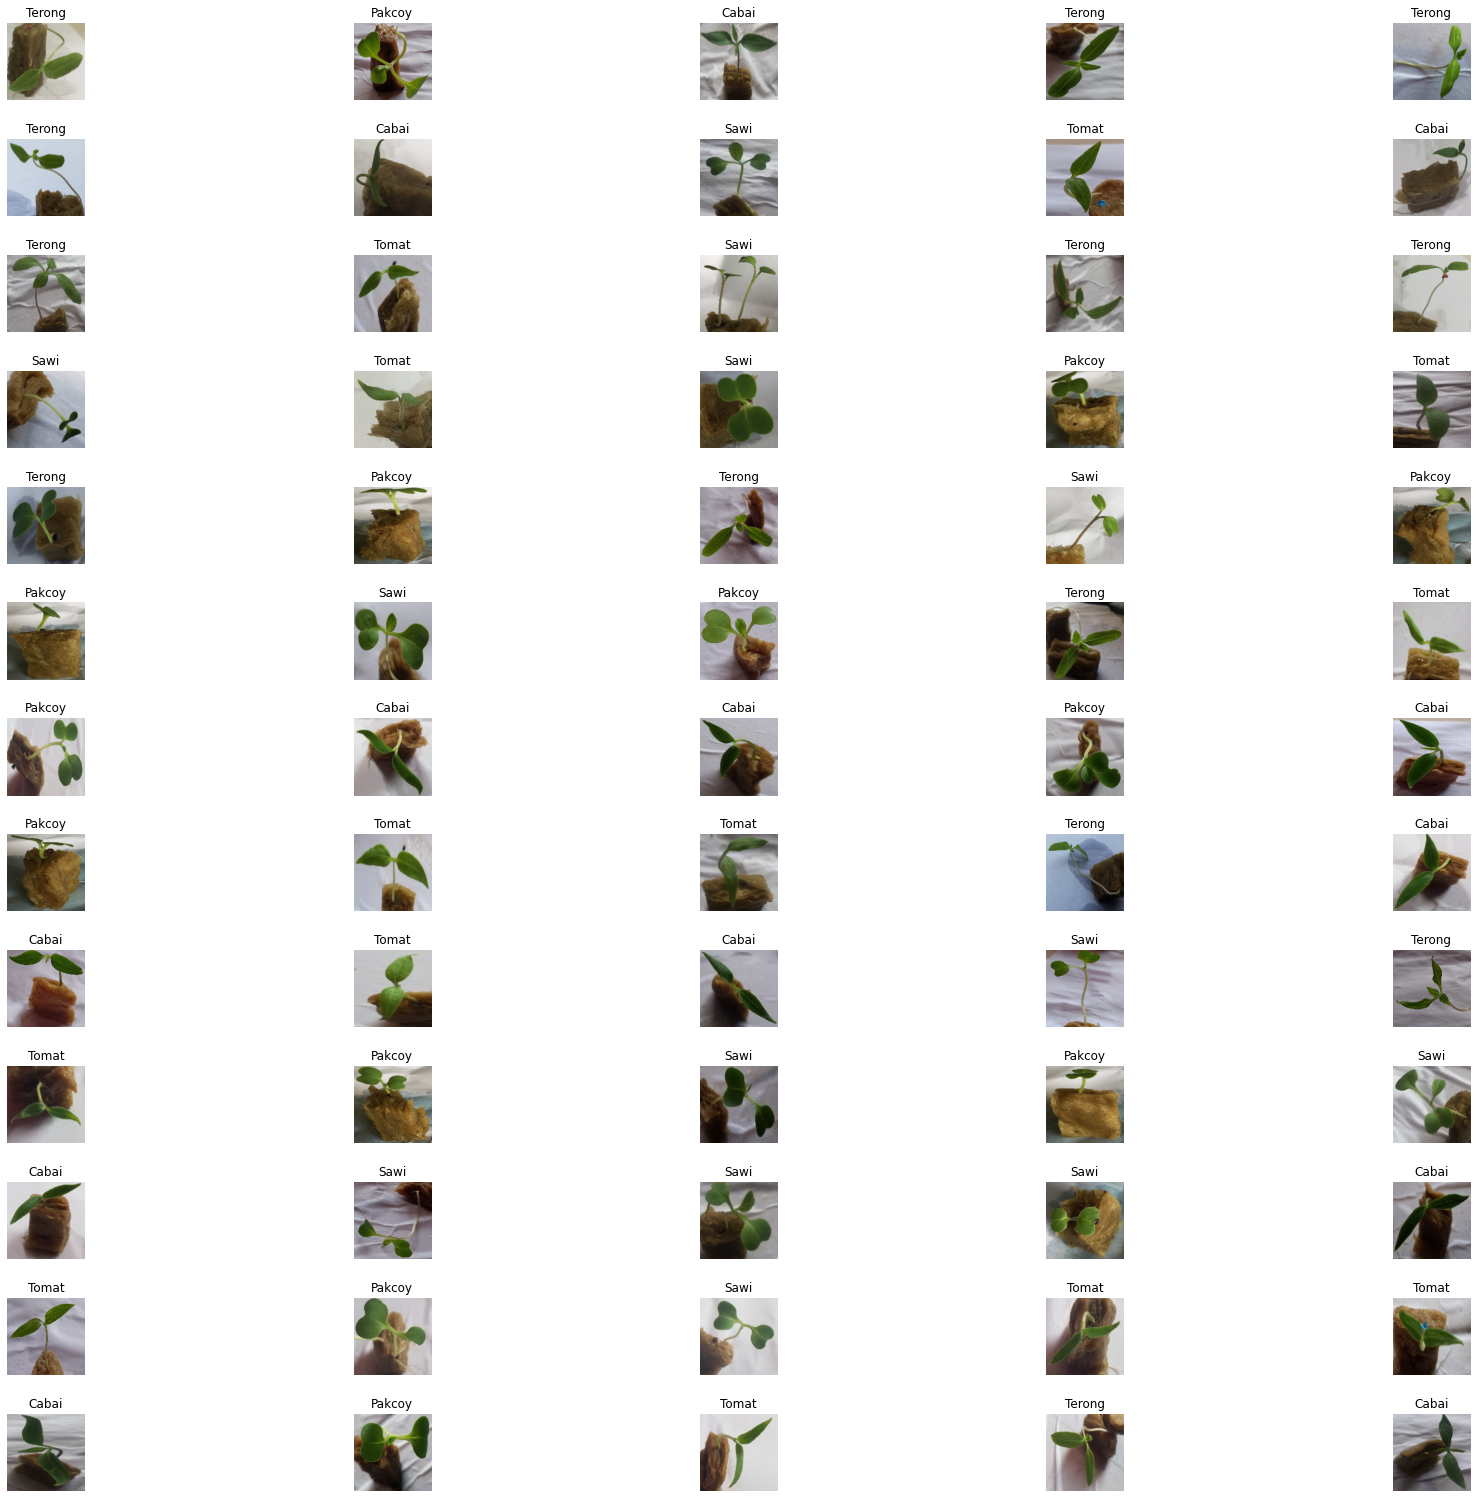

In [0]:
true_labels = dataset_labels[true_label_ids]
plt.figure(figsize=(30,27))
plt.subplots_adjust(hspace=0.5)
for n in range(true_label_ids.size):
  plt.subplot(13,5,n+1)
  plt.imshow(test_image_batch[n])
  plt.title(true_labels[n].title())
  plt.axis('off')
# _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

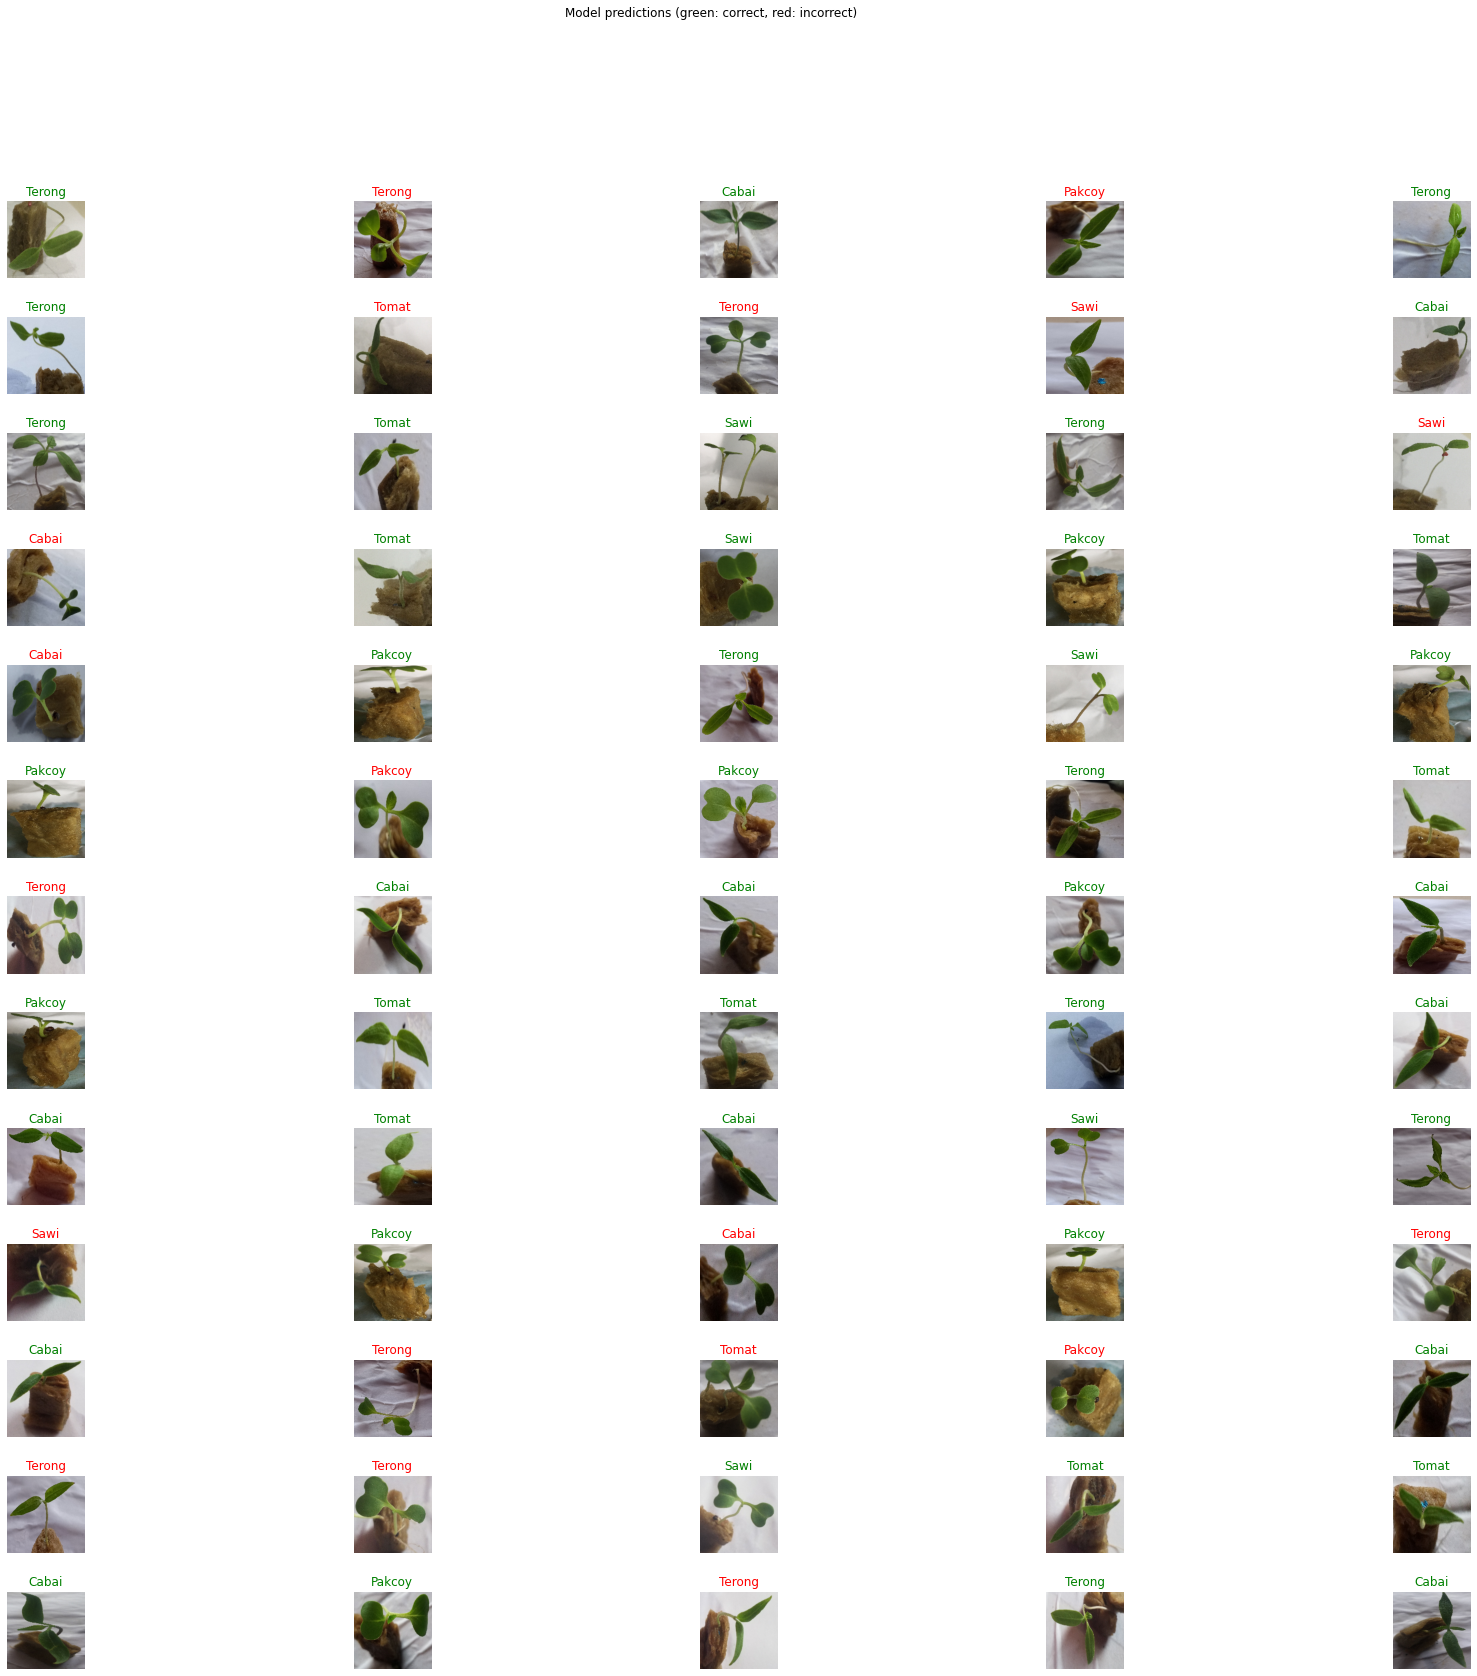

In [0]:
predicted_ids = np.argmax(predict, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(30,27))
plt.subplots_adjust(hspace=0.5)
for n in range(true_label_ids.size):
  plt.subplot(13,5,n+1)
  plt.imshow(test_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")